## **Objective: Demonstrate Gradient Boost Methods With Proper Results And Visualizations**

* ### **Showcase GBM Classifier Techniques**
  * RandomForest Classifier
  * Decision Tree Classifier
  * AdaBoost Classifier
  * XGBoost Classifier 
  * LightGBM Classifier 
  * Catboost Classifier 

* ### **Showcase GBM Regression Techniques**
  * XGBoostRegressor
  * CatboostRegressor
  * LightGBMRegressor
* ### **Showcase GBM Ranking Techniques**
  * XGBoost Ranking
  * Catboost Ranking
  * LightGBM Ranking

#### **Uncomment and Run following to install dependencies if not already installed**

In [206]:
# !pip3 install xgboost catboost lightgbm shap

In [268]:
import sys
import numpy as np
import pandas as pd
from catboost import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

#Make the sheet width 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>" ))

In [269]:
train_df, test_df = datasets.amazon()
train_df = train_df[:5000]
test_df = test_df[:5000]
print(train_df.shape, test_df.shape)

(5000, 10) (5000, 10)


In [270]:
train_df.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [271]:
#Lets list all the categorical columns
categorical_columns = train_df.drop('ACTION', axis=1).columns
print(categorical_columns)

Index(['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE'],
      dtype='object')


In [272]:
#Lets apply Logistic Regression, RandomForest, xgBoost, LightGBM and catBoost to the data
#For other methods except catBoost we need to have one hot encoding
#Now lets apply one hot encoding to categorical columns
def applyOneHot(df, cat_columns):
    onehot_df = df[cat_columns]
    onehot_df = pd.get_dummies(onehot_df, columns = cat_columns)
    onehot_drop = df.drop(cat_columns, axis = 1)
    ret = pd.concat([onehot_drop, onehot_df], axis = 1)
    return ret

train_df_one_hot = applyOneHot(train_df, categorical_columns)
print(train_df_one_hot.shape)

(5000, 6963)


### **Split dataset into training and testing**

In [273]:
y = train_df_one_hot['ACTION']
X = train_df_one_hot.drop('ACTION', axis=1)

#Lets use 25% of the data as test because train data is unlabled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### **Showcase GBM Classifier Techniques**
* RandomForest Classifier
* Decision Tree Classifier
* AdaBoost Classifier
* XGBoost Classifier 
* LightGBM Classifier 
* Catboost Classifier 

### **RandomForest Classifier**

In [274]:
%%time
#Lets apply random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, min_samples_split=2)
clf.fit(X_train, y_train)
print(f"Train score={clf.score(X_train, y_train):.3}")
print(f"Test score={clf.score(X_test, y_test):.3}")

Train score=0.995
Test score=0.945
CPU times: user 1.25 s, sys: 15.2 ms, total: 1.27 s
Wall time: 1.26 s


### **Decision Tree Classifier**

In [275]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print(f"Train score={clf.score(X_train, y_train):.3}")
print(f"Test score={clf.score(X_test, y_test):.3}")

Train score=1.0
Test score=0.931


### **AdaBoost Classifier**

In [276]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
print(f"Train score={clf.score(X_train, y_train):.3}")
print(f"Test score={clf.score(X_test, y_test):.3}")

Train score=0.955
Test score=0.934


### **XGB Classifier**

In [277]:
%%time
#Lets apply xgBoost default parameters
import xgboost as xgb
clf = xgb.XGBClassifier(tree_method='hist')
clf.fit(X_train, y_train)
print(f"Train score={clf.score(X_train, y_train):.3}")
print(f"Test score={clf.score(X_test, y_test):.3}")

Train score=0.945
Test score=0.936
CPU times: user 8.48 s, sys: 360 ms, total: 8.84 s
Wall time: 8.79 s


### **LightGBM Classifier**

In [278]:
%%time
#Lets apply LightGBM
import lightgbm as lgb
clf = lgb.LGBMClassifier(boosting_type='goss')
clf.fit(X_train, y_train)
print(f"Train score={clf.score(X_train, y_train):.3}")
print(f"Test score={clf.score(X_test, y_test):.3}")

Train score=0.944
Test score=0.936
CPU times: user 1.46 s, sys: 22.4 ms, total: 1.49 s
Wall time: 1.48 s


In [279]:
y = train_df['ACTION']
X = train_df.drop('ACTION', axis=1)

#Lets use 25% of the data as test because train data is unlabled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#and 25% of train data as validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

### **CatBoost Classifier**

In [280]:
%%time
from catboost import CatBoostClassifier 
clf = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    # cat_features=categorical_columns.to_series(),
    early_stopping_rounds=200,
    verbose=200,
    random_seed=1
)
clf.fit(X_train, y_train, 
        eval_set=(X_valid, y_valid), 
        use_best_model=True)

Learning rate set to 0.040909
0:	test: 0.5259410	best: 0.5259410 (0)	total: 5.02ms	remaining: 5.02s
200:	test: 0.5836916	best: 0.6098776 (10)	total: 632ms	remaining: 2.51s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.609877551
bestIteration = 10

Shrink model to first 11 iterations.
CPU times: user 1.22 s, sys: 122 ms, total: 1.35 s
Wall time: 748 ms


In [281]:
print(f"Train score={clf.score(X, y):.3}")
print(f"Test score={clf.score(X_test, y_test):.3}")

Train score=0.941
Test score=0.936


### **Plot CatBoost Features Importance**

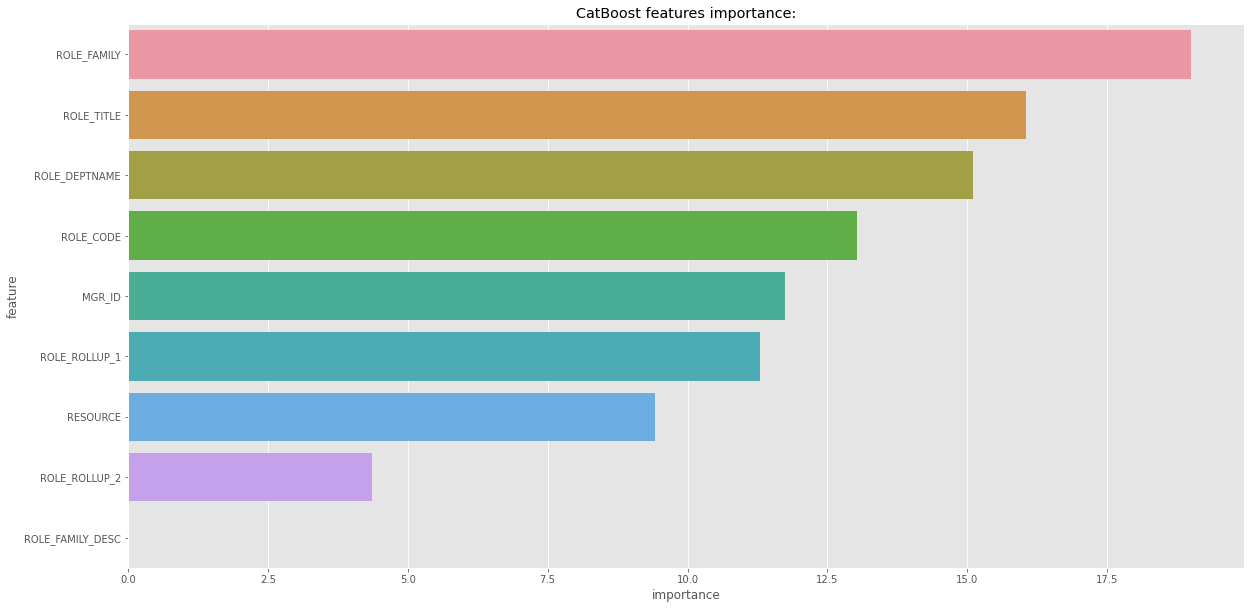

In [282]:
#Lets look at feature importance
feature_importance_df = pd.DataFrame(clf.get_feature_importance(prettified=True).values, 
                                     columns=['feature', 'importance'])


plt.figure(figsize=(20, 10));
sns.barplot(x="importance", y="feature", data=feature_importance_df);
plt.title('CatBoost features importance:');

### **Showcase Gradient Boost Regression Rechniques**
* XGBoostRegressor
* CatboostRegressor
* LightGBMRegressor

In [283]:
from xgboost import XGBRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [284]:
boston = load_boston()
x, y = boston.data, boston.target
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

### **XGBRegressor**

In [285]:
xgbr = XGBRegressor(verbosity=0) 
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

xgbr.fit(xtrain, ytrain)
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)
scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

Training score:  0.9738369134305678
Mean cross-validation score: 0.88
K-fold CV average score: 0.87
MSE: 6.99
RMSE: 2.64


### **Plot XGBRegressor Predictions**

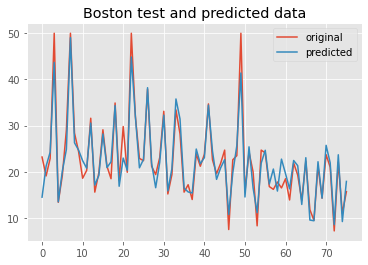

In [286]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

### **CatBoostRegressor**

In [287]:
from catboost import CatBoostRegressor

#List of categorical columns
categoricalcolumns = X_train.columns.tolist()
print("Names of categorical columns : ", categoricalcolumns)
#Get location of categorical columns
cat_features = [X_train.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

# X_train, X_test, y_train, y_test 

cb_model = CatBoostRegressor(iterations=100,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='RMSE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model.fit(X_train, y_train,
             eval_set=(X_test, y_test),
             cat_features=cat_features,
             use_best_model=True,
             verbose=True)

catpred = cb_model.predict(X_test)
catpred

Names of categorical columns :  ['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']
Location of categorical columns :  [0, 1, 2, 3, 4, 5, 6, 7, 8]
0:	learn: 0.2258937	test: 0.2448269	best: 0.2448269 (0)	total: 4.41ms	remaining: 436ms


75:	learn: 0.2063507	test: 0.2371252	best: 0.2371252 (75)	total: 1.48s	remaining: 469ms
99:	learn: 0.2024032	test: 0.2362054	best: 0.2362016 (98)	total: 1.87s	remaining: 0us

bestTest = 0.2362015668
bestIteration = 98

Shrink model to first 99 iterations.


array([0.97810082, 0.9749964 , 0.89895866, ..., 0.9486841 , 0.94782169,
       0.94572893])

### **Plot CatBoostRegressor Feature Importance**

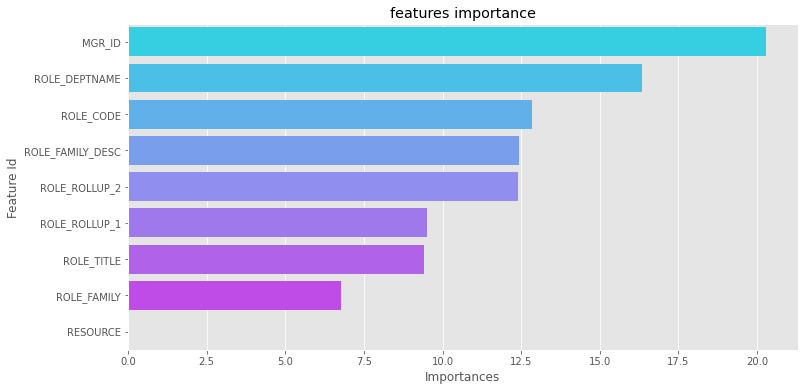

In [288]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(cb_model.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');

In [289]:
import math
from sklearn import metrics

y_predict= cb_model.predict(X_test)
#RMSE
Rmse_test = math.sqrt(mean_squared_error(y_test,y_predict))
#R2 Score
r2_test = metrics.r2_score(y_test,y_predict)
# Adjusted R2 Score
n= X_train.shape[0] # total no of datapoints
p= X_train.shape[1] # total no of independent features
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
#print results
print("Evaluation on test data")
print("RMSE: {:.2f}".format(Rmse_test))
print("R2: {:.2f}".format(r2_test))
print("Adjusted R2: {:.2f}".format(adj_r2_test))

Evaluation on test data
RMSE: 0.24
R2: 0.07
Adjusted R2: 0.07


In [290]:
import seaborn as sns
import lightgbm as ltb
from sklearn import metrics

plt.style.use('ggplot')

In [291]:
model = ltb.LGBMRegressor()
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)

print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.05247269253644493
0.026808172450067957


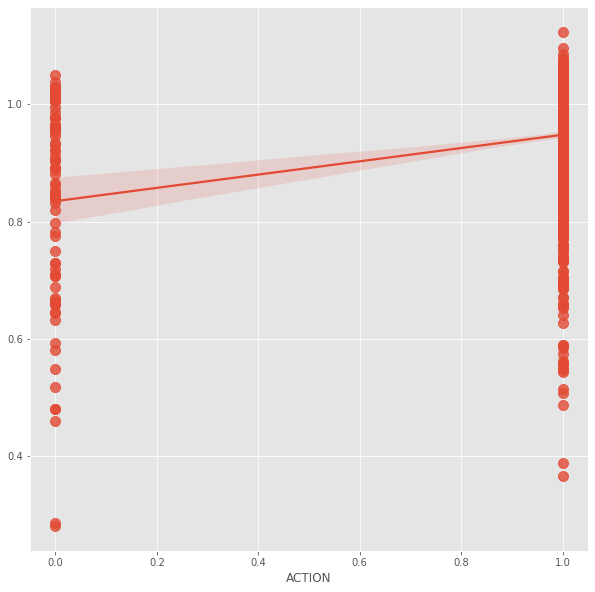

In [292]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

### **Showcase Gradient Boost Ranking Techniques**
* XGBoost Ranking
* Catboost Ranking
* LightGBM Ranking

In [293]:
!git clone  
!cp -r xgboost-ranking-example/data/ ./data

fatal: destination path 'xgboost-ranking-example' already exists and is not an empty directory.


### **XGBoost Ranking**

In [294]:
from sklearn.datasets import load_svmlight_file

#  This script demonstrate how to do ranking with XGBRanker
x_train, y_train = load_svmlight_file("./data/mq2008.train")
x_valid, y_valid = load_svmlight_file("./data/mq2008.vali")
x_test, y_test = load_svmlight_file("./data/mq2008.test")

group_train = []
with open("./data/mq2008.train.group", "r") as f:
    data = f.readlines()
    for line in data:
        group_train.append(int(line.split("\n")[0]))

group_valid = []
with open("./data/mq2008.vali.group", "r") as f:
    data = f.readlines()
    for line in data:
        group_valid.append(int(line.split("\n")[0]))

group_test = []
with open("./data/mq2008.test.group", "r") as f:
    data = f.readlines()
    for line in data:
        group_test.append(int(line.split("\n")[0]))

params = {'objective': 'rank:ndcg', 'learning_rate': 0.1,
          'gamma': 1.0, 'min_child_weight': 0.1,
          'max_depth': 6, 'n_estimators': 4}
xgb_rank_model = xgb.sklearn.XGBRanker(**params)
xgb_rank_model.fit(x_train, y_train, group_train, verbose=True,
          eval_set=[(x_valid, y_valid)], eval_group=[group_valid])
pred = xgb_rank_model.predict(x_test)

[0]	eval_0-map:0.704828
[1]	eval_0-map:0.709254
[2]	eval_0-map:0.710233
[3]	eval_0-map:0.716847


### **Plot XGBoost Ranking**

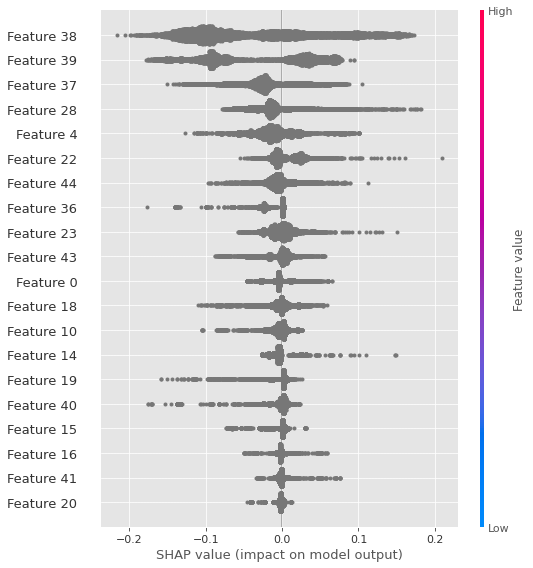

In [295]:
import shap
explainer = shap.TreeExplainer(xgb_rank_model)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train)

### **CatBoost Ranking**

In [296]:
from catboost import CatBoostRanker, Pool
from catboost.datasets import msrank_10k
train_df, test_df = msrank_10k()

params = {
    'iterations': 1000,
    'custom_metric': ['NDCG', 'PFound', 'AverageGain:top=10'],
    'verbose': False,
    'random_seed': 0,
    'loss_function': 'RMSE',
    'custom_metric': ['PrecisionAt:top=10', 'RecallAt:top=10', 'MAP:top=10']
}

X_train = train_df.drop([0, 1], axis=1).values
y_train = train_df[0].values
queries_train = train_df[1].values

X_test = test_df.drop([0, 1], axis=1).values
y_test = test_df[0].values
queries_test = test_df[1].values

train_pool = Pool(data=X_train, label=y_train, group_id=queries_train)
test_pool = Pool(data=X_test, label=y_test, group_id=queries_test)
model = CatBoostRanker(**params)
model.fit(train_pool, eval_set=test_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

### **Plot CatBoostRanker Model**

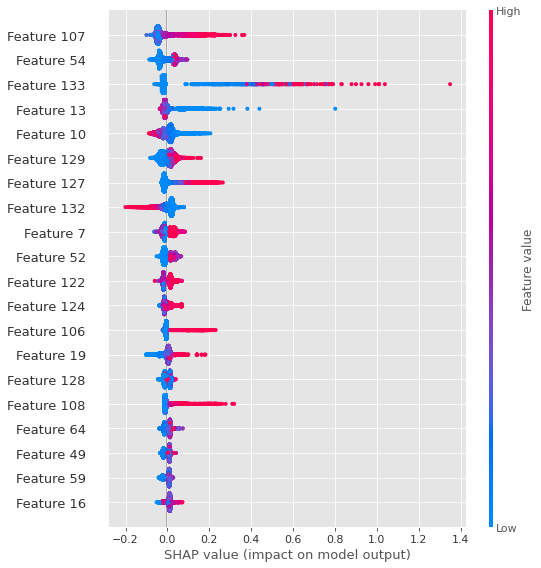

In [297]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

### **LightGBM Ranking**

In [302]:
import lightgbm
from collections import Counter

group_train = Counter(queries_train).values()
grp = []
for v in group_train:
  grp.append(v)
  
lgb_ranker_model = lightgbm.LGBMRanker(objective="lambdarank", metric="ndcg")
lgb_ranker_model.fit(X=X_train, y=y_train, group=grp, eval_at=10, verbose=10)

LGBMRanker(metric='ndcg', objective='lambdarank')

### **Plot LGBMRanker Model**

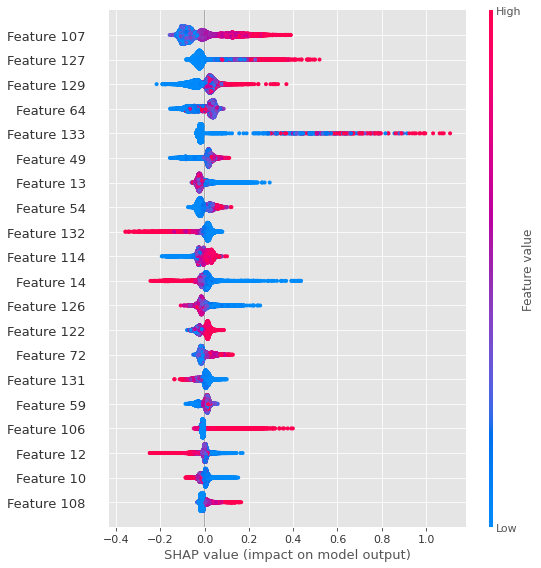

In [303]:
explainer = shap.TreeExplainer(lgb_ranker_model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)